In [549]:
# for read image
img  = plt.imread("PICC.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img.shape
#Conversion numpy to list
Img_Matrix = gray.tolist()

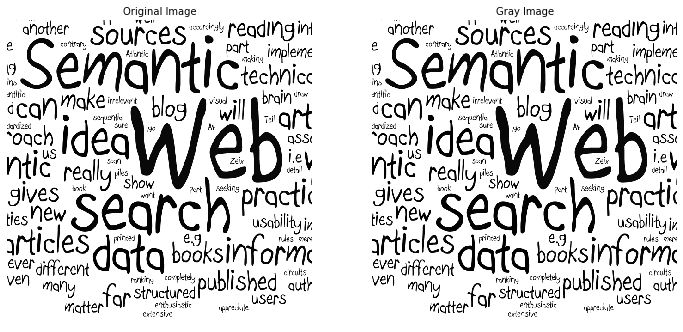

(660, 660)

In [550]:
# define loop for fram
fig, axs = plt.subplots(1,2,figsize=(12,12))
# presented orignal image
axs[0].imshow(img,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image',fontsize='medium')
# presented inverse image
axs[1].imshow(gray,cmap='gray')
axs[1].axis('off')
axs[1].set_title('Gray Image',fontsize='medium')
plt.show()
gray.shape

In [551]:
def generate_max_med_image(rows,col,array,Kernal,globel_max):     
    Point = -1
    for i in range(0,rows):
        for j in range(0,col):
            for k in range(0,Kernal):
                for l in range(0,Kernal):
                    if k==1 and l==1:
                        Point = Point+1
                        array[i+k][j+l] = globel_max[Point]
    return array

In [552]:
def NonlinearFilter(Img_Matrix,type="median"):
    import statistics
    rows = len(Img_Matrix)-2
    # find number of column
    col = len(Img_Matrix[0])-2
    #filter of window size
    Kernal = 3
    array = Img_Matrix 
    # store for min effected image
    Min_Image = []
    # store for max effected image
    Max_Image = []
    # store for medin effected image
    Medin_Image = []
    # store for max extrected values
    globel_max = []
    # store for medin extrected values
    globel_medin = []
    # for rows
    for i in range(0,rows):
        row = []
        # for column
        for j in range(0,col):
            row = []
            # for store min
            Max = 0
            # for store max
            Min = 0
            # for store medin
            Medin = 0
            # for row of window
            for k in range(0,Kernal):
                # for colum of window
                for l in range(0,Kernal):
                    # store extracted value in row
                    row.append(array[i+k][j+l])
            # find min from selected values
            Min=min(row)
            # find max from selected values
            Max=max(row)
            # find medin from selected values
            Medin=round(statistics.median(row))
            # store max values in array
            globel_max.append(Max)
            # store medin values in array
            globel_medin.append(Medin)
            #print(Medin)
            # for rows
            for k in range(0,Kernal):
                # for column
                for l in range(0,Kernal):
                    # condition for replacement min
                    if k==1 and l==1:
                        # replacement of min
                        array[i+k][j+l] = Min
    # final image effected by min
    Min_Image = array
    # for MAX
    Max_Image  = generate_max_med_image(rows,col,array,Kernal,globel_max)
    Medin_Image = generate_max_med_image(rows,col,array,Kernal,globel_medin)
    return(Min_Image, Max_Image, Medin_Image)
    

In [568]:
Final_Image1, Final_Image2, Final_Image3   =   NonlinearFilter(Img_Matrix)

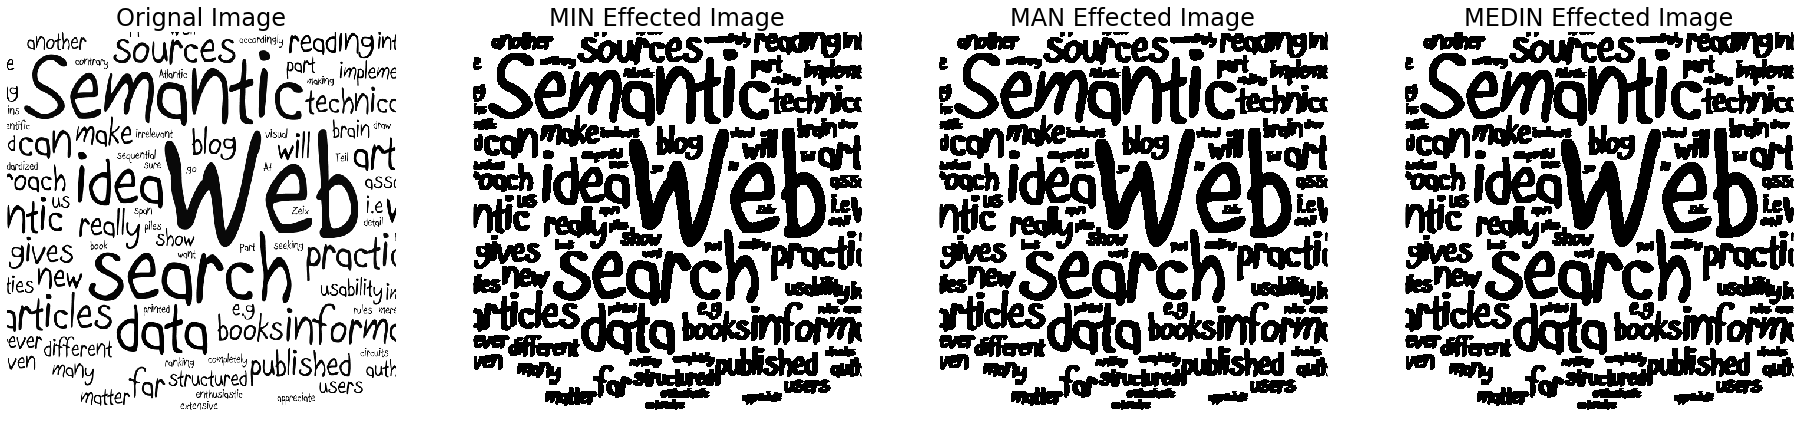

In [569]:
FMIN = np.array(Final_Image1)
FMAX = np.array(Final_Image2)
FMAD = np.array(Final_Image3)
# define loop for fram
fig, axs = plt.subplots(1,4,figsize=(32,32))
# presented orignal image
axs[0].imshow(gray,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Orignal Image',fontsize='24')
axs[1].imshow(FMIN,cmap='gray')
axs[1].axis('off')
axs[1].set_title('MIN Effected Image',fontsize='24')
# presented inverse image
axs[2].imshow(FMAX,cmap='gray')
axs[2].axis('off')
axs[2].set_title('MAN Effected Image',fontsize='24')
# presented inverse image
axs[3].imshow(FMAD,cmap='gray')
axs[3].axis('off')
axs[3].set_title('MEDIN Effected Image',fontsize='24')
plt.show()